In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1477,ham,Why you keeping me away like this,NaN,NaN,NaN
1130,ham,Howz pain?hope u r fine..,NaN,NaN,NaN
4618,ham,"Sorry, I'll call later In meeting.",NaN,NaN,NaN
3363,ham,"Yo my trip got postponed, you still stocked up?",NaN,NaN,NaN
2485,ham,Lol that's different. I don't go trying to fin...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3166,ham,"When people see my msgs, They think Iam addict..."
3130,spam,LookAtMe!: Thanks for your purchase of a video...
4689,ham,Ok no prob
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...
5216,ham,I am late. I will be there at


In [8]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,label,text
1050,ham,Are you available for soiree on June 3rd?
4002,ham,somewhere out there beneath the pale moon ligh...
2243,ham,Boo I'm on my way to my moms. She's making tor...
3250,ham,"IÛ÷ll leave around four, ok?"
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['label'] = encoder.fit_transform(df['label'])

In [12]:
df.sample(5)

,label,text
1130,0,Howz pain?hope u r fine..
5349,0,I'm home...
69,0,I plane to give on this month end.
2015,0,Just re read it and I have no shame but tell m...
5121,0,"Oops I did have it, &lt;#&gt; ?"


In [13]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [20]:
data = df.where((pd.notnull(df)), '')

In [29]:
vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(data['text'])

In [30]:
pca = PCA(n_components=2)
Z_pca = pca.fit_transform(X.toarray())

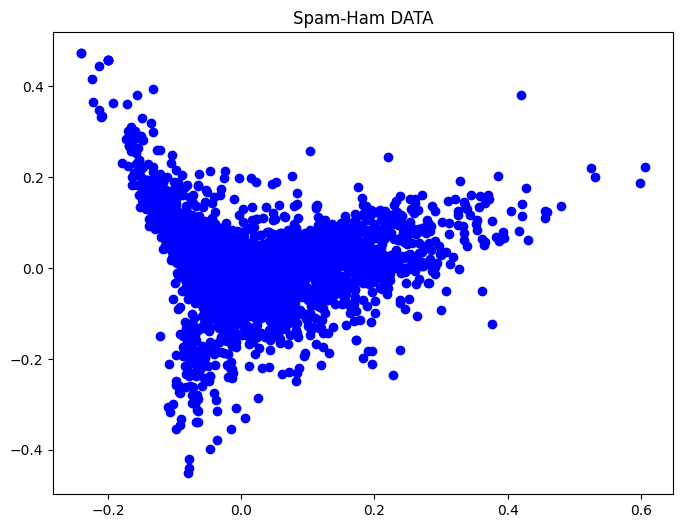

In [31]:
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}  # 0: Ham (blue), 1: Spam (red)
for i in range(len(X_pca)):
    
    plt.scatter(Z_pca[i, 0], Z_pca[i, 1], color=color, marker='o')

plt.title('Spam-Ham DATA')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X = data['text']

Y = data['label']

In [63]:
X = data.drop('label', axis=1)
y = data['label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [66]:
models = {
    'Logistic Regression':LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


In [70]:
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}, R^2 Score: {r2}, Accuracy: {accuracy}')

Logistic Regression - Mean Squared Error: 0.1402321083172147, R^2 Score: -0.16310461192350934, Accuracy: 0.8597678916827853


C:\Users\cancl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Classification metrics can't handle a mix of binary and continuous targets